In [1]:
import pandas as pd
import numpy as np
import os
import analyseCommon as ac
import matplotlib.pyplot as plt

file_path = '../data'
filePath = os.path.join(file_path, 'input_ML_tabula_Muris_modified.csv')
data = pd.read_csv(filePath, sep=",")

filePath = os.path.join(file_path, 'APAfreq.tsv')
data1 = pd.read_csv(filePath, sep="\t")

print(data.columns)
print(data1.columns)

# print(len(data['cleavage site'].unique()))
# print(len(data['cleavage site']))

# test = np.where(data['terminal exon'] == data1['terminal exon'], 'True', 'False')

merged = data.merge(data1,how='outer',left_on=['terminal exon'],right_on=["terminal exon"])


print(data['sequence'].apply(len).describe())
print(data1['sequence'].apply(len).describe())

Index(['terminal exon', 'chromosome', 'direction', 'cleavage site', 'sequence',
       'frequency'],
      dtype='object')
Index(['terminal exon', 'chromosome', 'direction', 'cleavage site', 'sequence',
       'frequency', 'class'],
      dtype='object')
count    84745.0
mean       400.0
std          0.0
min        400.0
25%        400.0
50%        400.0
75%        400.0
max        400.0
Name: sequence, dtype: float64
count    51256.0
mean       400.0
std          0.0
min        400.0
25%        400.0
50%        400.0
75%        400.0
max        400.0
Name: sequence, dtype: float64


In [ ]:
print(merged['cleavage site_x'].tail())
print(merged['cleavage site_y'].head())
print(len(merged))
print(len(merged[merged['cleavage site_x'] != 'NaN']))
print(len(merged[merged['cleavage site_y'] != 'NaN']))
print(len(merged[merged['cleavage site_y'] == merged['cleavage site_x']]))

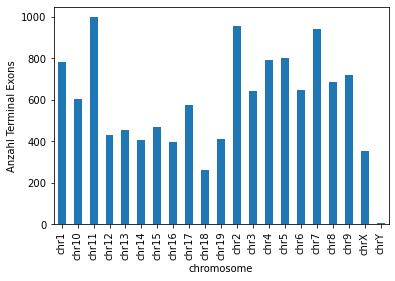

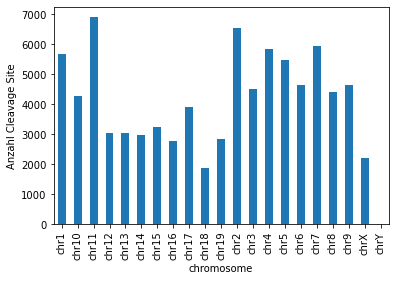

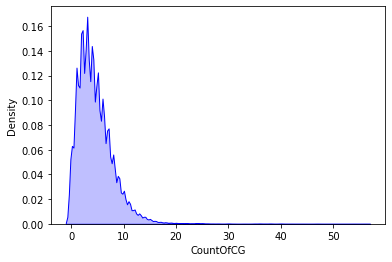

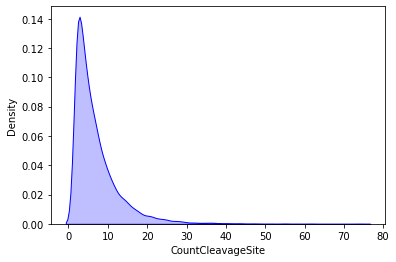

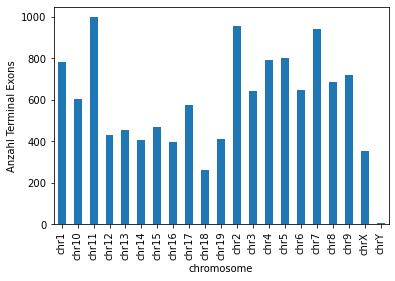

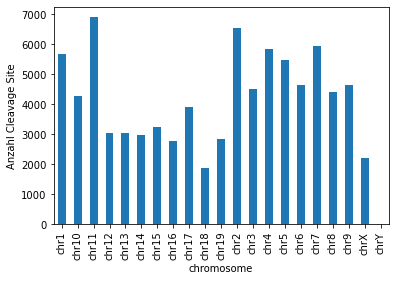

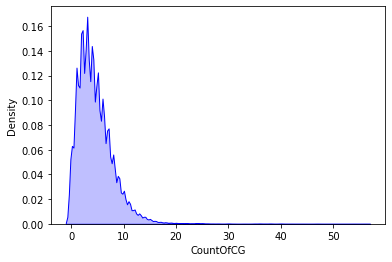

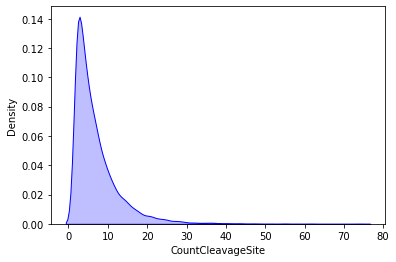

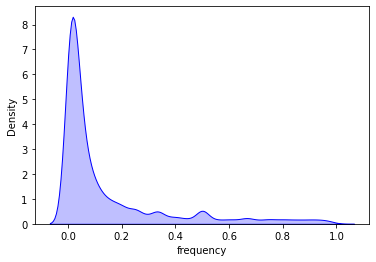

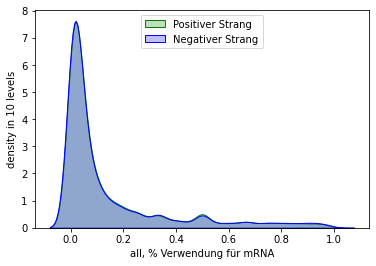

<Figure size 432x288 with 0 Axes>

In [4]:
ac.PlotAnzahlTerminalExonsByChromosome(data)
ac.PlotAnzahlCleavageSitesByChromosome(data)
ac.AmountOfCGInSequence(data)
ac.CountOfCromosoneFigure(data)

ac.PlotAnzahlTerminalExonsByChromosome(data)
ac.PlotAnzahlCleavageSitesByChromosome(data)
ac.AmountOfCGInSequence(data)
ac.CountOfCromosoneFigure(data)

ac.DencityOfColumnPlot(data, 'frequency')

ac.DencityOfColumnPlotByDirection(data, 'frequency', directionColumn='direction', usageText='all')

In [ ]:
def getUse(cell):
    return cell[197:203]

data['use'] = data['sequence'].apply(getUse)

data['useA'] = data['use'].str.count("A")
data['useG'] = data['use'].str.count("G")
data['useT'] = data['use'].str.count("T")
data['useC'] = data['use'].str.count("C")

data['ratioUseA'] = data['frequency'] * data['useA']
data['ratioUseG'] = data['frequency'] * data['useG']
data['ratioUseT'] = data['frequency'] * data['useT']
data['ratioUseC'] = data['frequency'] * data['useC']

plotData = [data['useA'], data['useG'], data['useT'], data['useC']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['useA', 'useG',
                    'useT', 'useC'])
# Creating plot
bp = ax.boxplot(plotData)
 
# show plot
plt.show()

data[['useA', 'useG', 'useT', 'useC']].describe()
ac.ScatterPlot(data, 'ratioUseA', 'frequency')
ac.ScatterPlot(data, 'ratioUseG', 'frequency')
ac.ScatterPlot(data, 'ratioUseT', 'frequency')
ac.ScatterPlot(data, 'ratioUseC', 'frequency')

In [ ]:
data['sequenceA'] = data['sequence'].str.count("A")
data['sequenceG'] = data['sequence'].str.count("G")
data['sequenceT'] = data['sequence'].str.count("T")
data['sequenceC'] = data['sequence'].str.count("C")

data['ratioA'] = data['frequency'] * data['sequenceA']
data['ratioG'] = data['frequency'] * data['sequenceG']
data['ratioT'] = data['frequency'] * data['sequenceT']
data['ratioC'] = data['frequency'] * data['sequenceC']

plotData = [data['sequenceA'], data['sequenceG'], data['sequenceT'], data['sequenceC']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['sequenceA', 'sequenceG',
                    'sequenceT', 'sequenceC'])
# Creating plot
bp = ax.boxplot(plotData)

# show plot
plt.show()

# print(data[['sequenceA', 'sequenceG', 'sequenceT', 'sequenceC']].describe())
# print(data[['ratioA', 'ratioG', 'ratioT', 'ratioC']].describe())

ac.ScatterPlot(data, 'ratioA', 'frequency')
ac.ScatterPlot(data, 'ratioG', 'frequency')
ac.ScatterPlot(data, 'ratioT', 'frequency')
ac.ScatterPlot(data, 'ratioC', 'frequency')